# Ejercicio práctica 4: Optimización no lineal con Scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Consideremos la función de activación 
$$
\sigma (x) = \max\left\{x, 0\right\}
$$
que, en Machine Learning, es conocida como **ReLU** (Linear Unit Rectifier).
A partir de ella construimos la sencilla red neuronal con dos canales de entrada $(x, y)$ y una sóla neurona
$$
NN(x, y) =  \sigma\left( 2 * x - 3 * y + 1\right)
$$
Se pide:

1) ¿Es diferenciable esta función? ¿Por qué?
2) Define dicha función.


In [2]:
# Completar aquí
# Definir la función "ReLU"
def relu(x):
    return np.maximum(x, 0)

# Definir la función de Red Neuronal
def neural_network(v):
    x, y = v
    return relu(2 * x - 3 * y + 1)
# --------------------


Define ahora la función objetivo siguiente:
$$
MSE ( x, y) = \frac{1}{2} * \left[ (NN(x,y) -1)^2 + (NN(x,y) - 2)^2\right]
$$

In [3]:
# Completar aquí
# Definir la función MSE
def mse(v):
    x, y = v
    nn_value = neural_network([x,y])
    return 1/2 * ((nn_value - 1)**2 + (nn_value - 2)**2)
# --------------------


Dibuja la función $MSE ( x, y)$ en la ventana $-5\leq x\leq 5$, $-5\leq y\leq 5$.

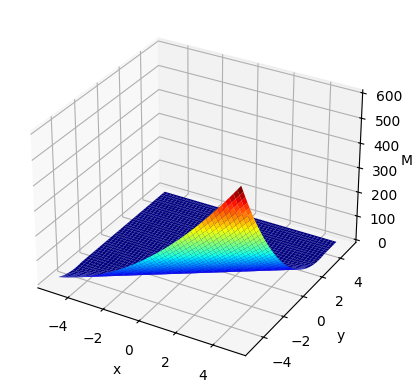

In [4]:
# Completar aquí
# Dibujar la función MSE
r_min, r_max = -5.0, 5.0
xaxis = np.arange(r_min, r_max, 0.01)
yaxis = np.arange(r_min, r_max, 0.01)
x, y = np.meshgrid(xaxis, yaxis)
v = x, y
results = mse(v)
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(x, y, results, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('MSE')
plt.show()
# --------------------


Minimiza $MSE ( x, y)$ con el algoritmo de Powell y tomando como punto de inicialización uno elegido aleatoriamente. 

In [43]:
# Completar aquí
initial_point = np.random.rand(2) * 10 - 5 # Punto aleatorio entre [-5, 5]
result = minimize(mse, initial_point, method='Powell')

# Resumen de resultados
print('Estado : %s' % result['message'])
print('Número total de evaluaciones de la función objetivo: %d' % result['nfev'])

# Evaluación de la solución
solution = result['x']
evaluation = neural_network(solution)
print('Solución: f(%s) = %.5f' % (solution, evaluation))
# --------------------


Estado : Optimization terminated successfully.
Número total de evaluaciones de la función objetivo: 78
Solución: f([3.25137705 2.00091803]) = 1.50000
